##  Importing all the necessary libraies

In [16]:
import pandas as pd
import pickle as p
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

##  Reading the Training and Testing datasets

In [17]:
train_dataset = pd.read_csv("Datasets/Training.csv")
test_dataset = pd.read_csv("Datasets/Testing.csv")
train_dataset.tail()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,No Disease,NaN
4923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,No Disease,NaN
4924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,No Disease,NaN
4925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,No Disease,NaN
4926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,No Disease,NaN


##  Seperating the features and the label for both datasets

In [18]:
X_train, X_test = train_dataset.iloc[:, :132].values, test_dataset.iloc[:, :132].values # Input Data
y_train, y_test = train_dataset.iloc[:, 132].values, test_dataset.iloc[:, 132].values # Labeled Data: prognosis

##  Creating a Support Vector Machine Classifer and training the model

In [19]:
svm_model = svm.SVC(kernel='rbf', random_state = 0)
svm_model.fit(X_train, y_train)

SVC(random_state=0)

##  Creating a Decision Tree Classifier and training the model

In [20]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

##  Testing both the models and finding their accuracy

In [21]:
y_predict = svm_model.predict(X_test)
y_predict_dt = dt_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_predict)
dt_accuracy = accuracy_score(y_test, y_predict_dt)

print(f"SVM Accuracy: {svm_accuracy}\nDT Accuracy:  {dt_accuracy}")


SVM Accuracy: 1.0
DT Accuracy:  0.9767441860465116


##  Displaying Confusion Matrix to compare both models

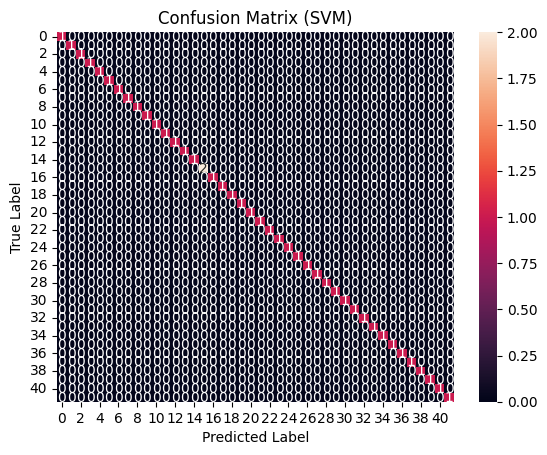

In [22]:
table_svm = pd.DataFrame(confusion_matrix(y_test, y_predict))
plt.figure()
sns.heatmap(table_svm, annot = True, fmt = "d", cmap = "rocket")
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

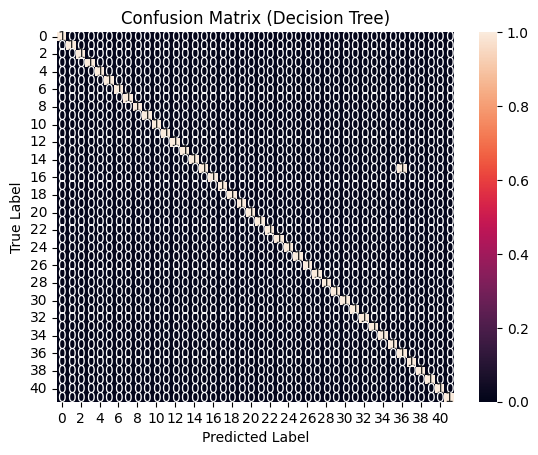

In [23]:
table_dt = pd.DataFrame(confusion_matrix(y_test, y_predict_dt))
plt.figure()
sns.heatmap(table_dt, annot = True, fmt = "d", cmap = "rocket")
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
#print(svm_model.predict([]))
for i in X_test[1]: print(i, end = " ")

0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
print(svm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))

['No Disease']


In [26]:
p.dump(svm_model, open("prediction_model.sav", "wb"))

In [27]:
loaded_model = p.load(open("prediction_model.sav", "rb"))

In [28]:
y_predict = loaded_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_predict)
print(svm_accuracy)

1.0
